In [ ]:
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset #link dataset

Previsão de doenças cardíacas
+70k pacientes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_cardio = pd.read_csv("cardio_train.csv", sep=";", index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Box(x=df_cardio["age"]/365, name="Idade"), row=1,col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2,col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=3,col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=4,col=1)

fig.update_layout(height=600)
fig.show()
# Análise Exploratória - Boxplots com Plotly , dados das pessoas que participaram nesse estudo a maioria 50+ , peso tb a mediana em 72, e mts pessoas alem do peso

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Bar(y=df_cardio["gender"].value_counts(), x=["Feminino", "Masculino"], name="Gênero"), row=1, col=1)
fig.add_trace(go.Bar(y=df_cardio["cholesterol"].value_counts(), x=["Normal", "Elevado", "Super Elevado"], name="Colesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=df_cardio["gluc"].value_counts(), x=["Normal", "Elevado", "Super Elevado"], name="Glicose"), row=1, col=3)
fig.add_trace(go.Bar(y=df_cardio["smoke"].value_counts(), x=["Não fumante", "Fumante"], name="Fumante"), row=2, col=1)
fig.add_trace(go.Bar(y=df_cardio["alco"].value_counts(), x=["Não alcoólatra", "Alcoólatra"], name="Álcool"), row=2, col=2)
fig.add_trace(go.Bar(y=df_cardio["active"].value_counts(), x=["Não ativo", "Ativo"], name="Atividade"), row=2, col=3)

fig.update_layout(height=700, title="Distribuições das Variáveis Cardíacas")
fig.show()
#Distribuição das Categorias em Barras Gênero (0 = mulher, 1 = homem)

In [ ]:
df_cardio["cardio"].value_counts()/df_cardio["cardio"].value_counts().sum()
#55% dos pacientes têm cardio = 0 (sem problema cardíaco)
#45% têm cardio = 1 (com problema cardíaco)

,count
cardio,
0,0.5003
1,0.4997


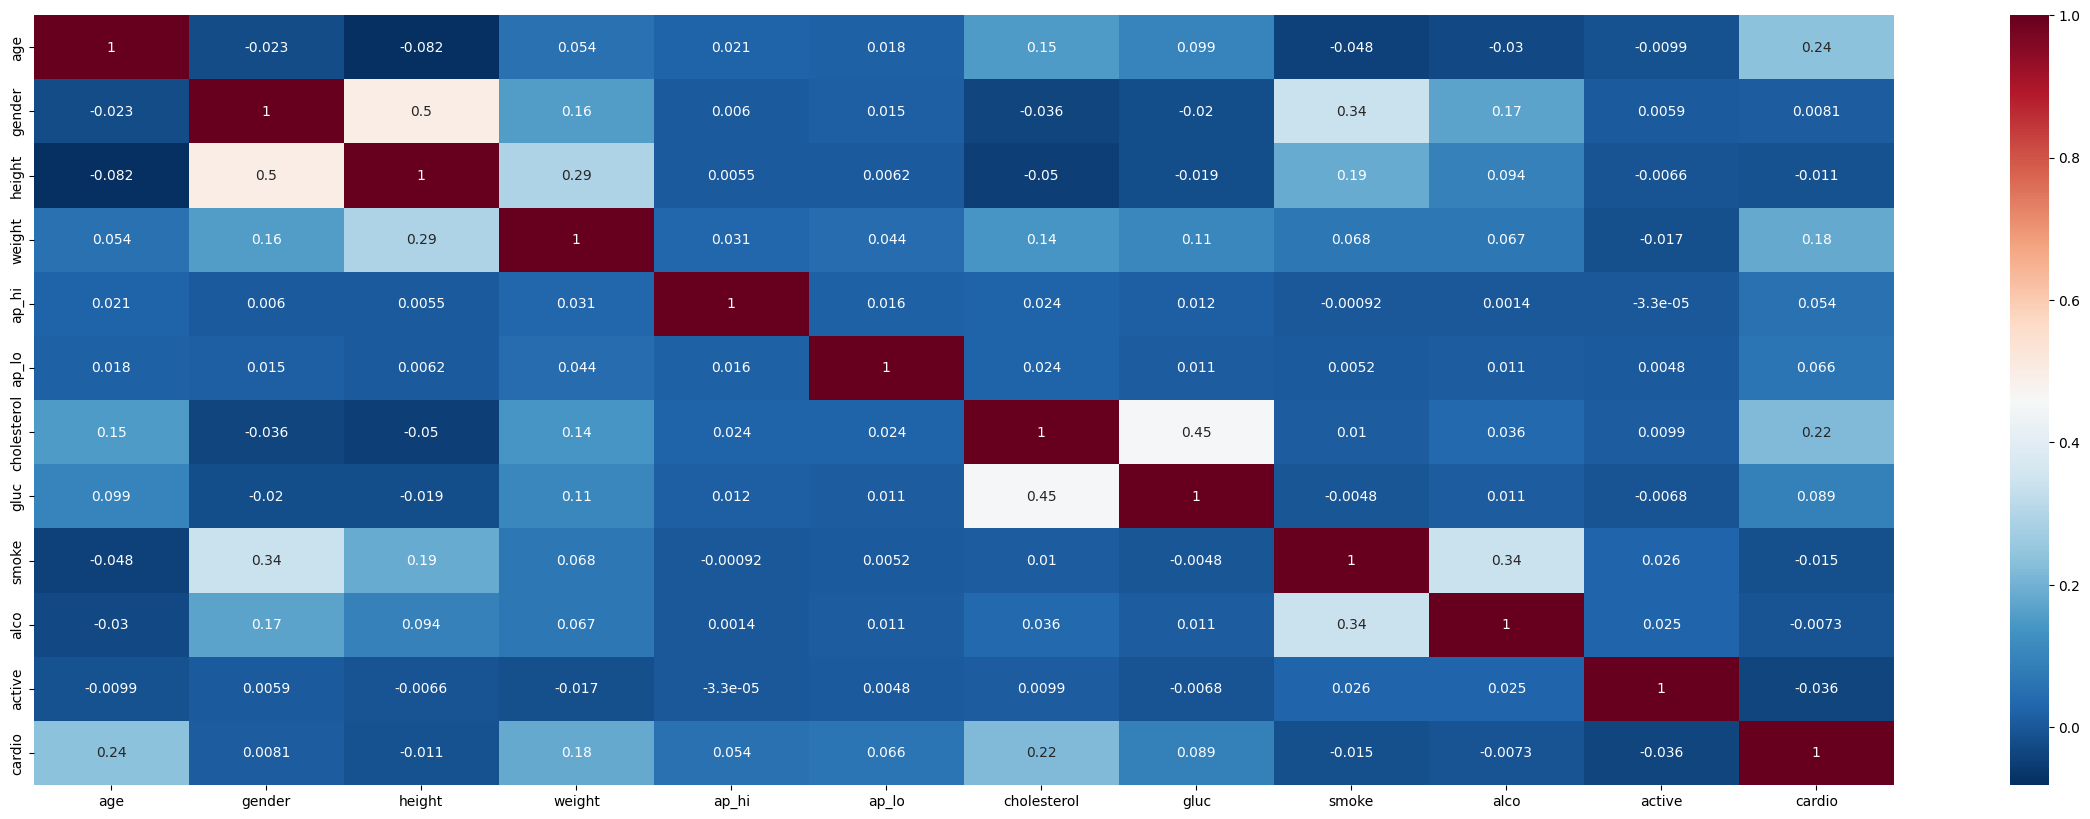

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df_cardio.corr(), annot=True, cmap="RdBu_r")
plt.show()
#traz uma correlacao entre as variavies do dataset, como por exemplo peso e genero aonde os homens
#sao mais pessados que as mulheres, e tambem fumante e o genero tem uma boa correlacao


In [ ]:
# Separando variável alvo e variáveis preditoras
y = df_cardio["cardio"]
x = df_cardio.drop(columns=["cardio"])

# Dividindo treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#y é a variável alvo (o que queremos prever).
#x são as variáveis preditoras (os dados de entrada).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ml_model = RandomForestClassifier(n_estimators=30, n_jobs=4, max_depth=8,)
ml_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=30, n_jobs=4)

In [ ]:
x_test.iloc[1] #hora de testar o modelo treinado, com a pessoa 1

,69098
age,21876.0
gender,1.0
height,170.0
weight,85.0
ap_hi,160.0
ap_lo,90.0
cholesterol,1.0
gluc,1.0
smoke,0.0
alco,0.0


In [ ]:
ml_model.predict(x_test.iloc[1].values.reshape(1, -1)) #fazendo o modelo prever oq ele acha se o modelo 1 tem problema cardiaco, se voltar 1 tem se voltar 0 não tem.

array([1])

In [ ]:
y_test.iloc[1] #testandu

np.int64(1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ml_model.predict(x_test)) #acuracia de 73%,

0.7378571428571429

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print(" Matriz de Confusão – treinamento")
print(confusion_matrix(y_test, ml_model.predict(x_test)))

print("\n Relatório treinamento")
print(classification_report(y_test, ml_model.predict(x_test)))


 Matriz de Confusão – Random Forest
[[8386 2075]
 [3430 7109]]

 Relatório – Random Forest
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10461
           1       0.77      0.67      0.72     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000

